In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

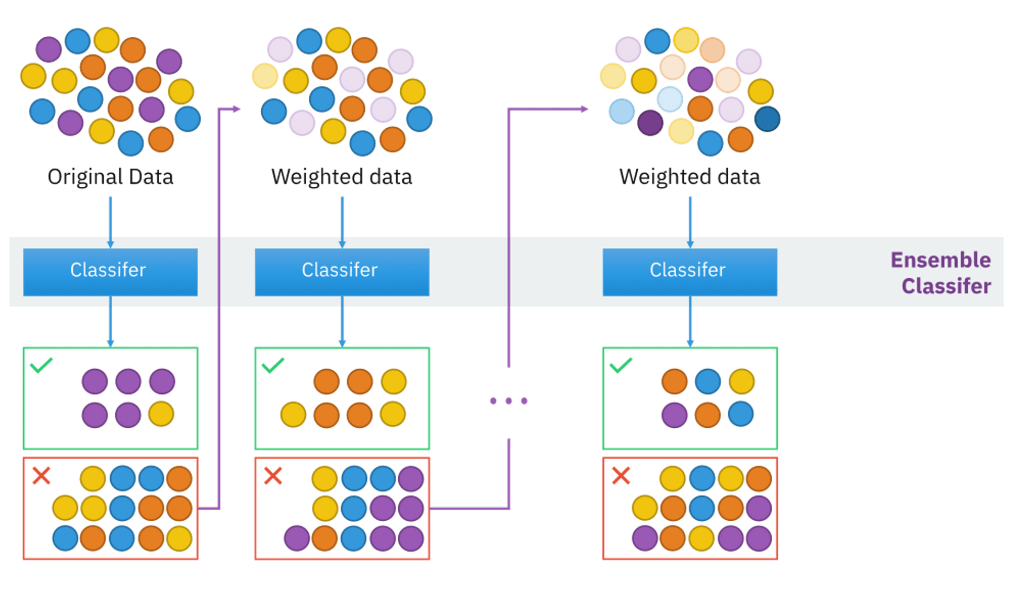

total error = total incorrect classified / total classicification
amount of error = 1/2log((1-total error)/total error)

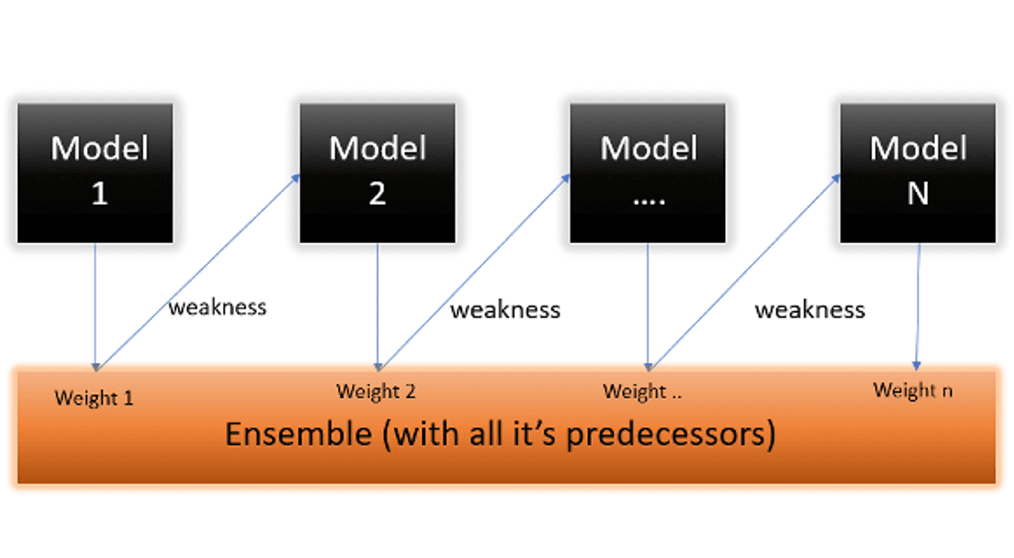

In [ ]:
X = pd.DataFrame(iris.data)
X.columns = iris.feature_names
y = pd.DataFrame(iris.target)
y.columns = ["target"]
import numpy as np
y = np.squeeze(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state = 43)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'adaboost':{
        'model': AdaBoostClassifier(algorithm='SAMME.R', random_state=None),
        'params' : {
            'n_estimators': [50,100],
             'learning_rate':[1]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'criterion':['gini','entropy','log_loss'],
            'max_features':['sqrt','log2']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,n_iter = 10)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best_params
0,svm,0.980000,"{'kernel': 'rbf', 'C': 1}"
1,adaboost,0.946667,"{'n_estimators': 50, 'learning_rate': 1}"
2,random_forest,0.960000,"{'n_estimators': 1, 'max_features': 'sqrt', 'c..."
3,logistic_regression,0.966667,{'C': 5}


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred = abc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("accaracy of adaboost classifier:",accuracy_score(y_test,y_pred))

accaracy of adaboost classifier: 0.9646017699115044
